# [オンライン開催]セキュリティから学ぶ機械学習第3回


## Section0. 異常検知技術の概要
『異常』とは、普通ではないもの、予期しないデータのパターンなどがあります。データマイニングにおいては異常という言葉はよく使われるもので、『異常値』、『外れ値』などとも呼ばれます。セキュリティ分野における異常とは、不正を検知したり、悪意のある行動を検知したりするための技術として扱われます。異常は様々な理由で発生します。ここでは大きく３つの種類を紹介します。



*   **点異常**: 個々の点が、他のデータ点とは異なるもの
*   **文脈異常**: 特定の文脈（時間帯や地域など）において、異常がみられるもの
*   **集合異常**: 個々の点は異常ではないものの、集合として捉えると異常となるもの



### Section0-1. 異常検知の基本的な考え方
正常となるモデルをデータから作り、そのモデルから外れる(閾値を超える)ものを異常とすること

観測値$\boldsymbol{x}^{'}$についての一つの自然な異常値$a(\boldsymbol{x}^{'})$として  
$$
    a(\boldsymbol{x}^{'}) = -Inp(\boldsymbol{x}^{'})
$$  
$In$は自然対数で、マイナスがついていることから出現率が小さいところに来た観測値に、高い異常度が与えられるということを表現しています。  
一般に、確率分布の引数に観測値を代入したものを『尤度(ゆうど)』といいます。

In [ ]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

**確率(密度)分布**  
ここでは、ガウス分布(正規分布)を定義します。

In [ ]:
#1次元正規分布の確率密度を返す関数
def gaussian_1dim(x, mu, sigma):
    return norm.pdf((x-mu)/sigma) / sigma

$\mu$(ミュー: mu), $\sigma$(シグマ: sigma)はそれぞれ、『母平均』, 『母分散』を表しています。  
  
母集団全体の平均が、母平均。  
サンプルの平均が標本平均です。

例えば、日本人の身長の平均を考えてみます。  
日本人全員の身長を調べるのは一般的には無理なので、ランダムに100人分のデータを選択しておおよその日本人全体の平均を考える、  
ということをします。(100人が妥当かどうかは、統計的に判断します)    
この例で言えば、日本人全員を母集団といい、この日本人全員の身長の平均を母平均と言います。  

また、サンプルの平均（この例の場合、取ってきた100 人の身長の平均）を標本平均、またはサンプル平均と言います。  

母集団を固定すると、  
母平均は１つの確定した値になりますが、標本平均はサンプリングの方法(この例の場合、どの100人をどのように選ぶか)に依存します。

In [ ]:
mu = 1
sigma = 0.5

x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
y = gaussian_1dim(x, mu, sigma)

np.linspace→第一引数startに最初の値、第二引数stopに最後の値、第三引数numに要素数を指定する。  
それらの引数に応じた間隔（公差）が自動的に算出してくれる、便利なNumpyのモジュールです。

In [ ]:
# 5%部分を表示するため
x0 = np.linspace(mu-3*sigma, mu + norm.ppf(0.025)*sigma, 20)
y0 = norm.pdf((x0-mu)/sigma) / sigma
x1 = np.linspace(mu+sigma*norm.ppf(1-0.025), mu+3*sigma, 20)
y1 = norm.pdf((x1-mu)/sigma) / sigma

norm.ppf → scipy.statsの一つのモジュール。期待値loc(=0)，標準偏差scale(=1)の正規分布のパーセント点関数の$q=0.025$での値を取得します。
ここでは、正規分布の両端2.5％ずつを色分けするために設定しています

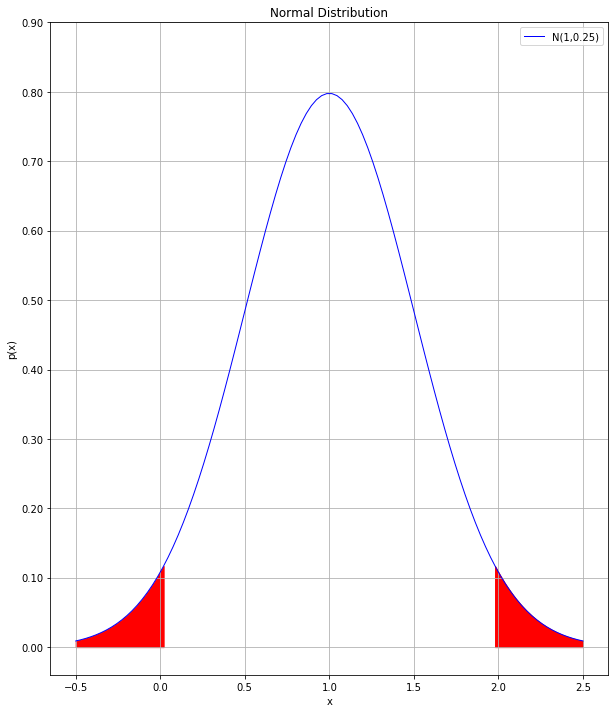

In [ ]:
# 確率密度分布
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(x, y,'-', color='blue', linewidth=1.0, label="N("+str(mu) + "," + str(sigma**2) + ")")
ax.fill_between(x0,y0,'-', color='red')
ax.fill_between(x1,y1,'-', color='red')
ax.set_title("Normal Distribution")
yticks = np.arange(0.0, 1.0, 0.1)
yticklabels = ["%.2f" % x for x in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
plt.show()

In [ ]:
# 異常度の定義
def func_anomary(p):
    return [- math.log(ele) for ele in p]

$a(\boldsymbol{x}^{'}) = -Inp(\boldsymbol{x}^{'})$  をプログラムとして準備

In [ ]:
y

array([0.0088637 , 0.01061158, 0.01265755, 0.01504265, 0.01781164,
       0.021013  , 0.02469887, 0.02892483, 0.03374966, 0.03923492,
       0.04544446, 0.05244378, 0.06029923, 0.06907714, 0.07884274,
       0.08965899, 0.10158529, 0.11467601, 0.12897904, 0.14453415,
       0.16137142, 0.17950955, 0.19895428, 0.21969684, 0.24171251,
       0.26495935, 0.2893771 , 0.31488638, 0.3413881 , 0.36876328,
       0.39687319, 0.42555986, 0.45464701, 0.48394145, 0.5132348 ,
       0.5423057 , 0.57092233, 0.59884537, 0.62583111, 0.651635  ,
       0.67601518, 0.69873628, 0.71957312, 0.73831444, 0.75476646,
       0.76875617, 0.78013441, 0.78877847, 0.79459432, 0.79751831,
       0.79751831, 0.79459432, 0.78877847, 0.78013441, 0.76875617,
       0.75476646, 0.73831444, 0.71957312, 0.69873628, 0.67601518,
       0.651635  , 0.62583111, 0.59884537, 0.57092233, 0.5423057 ,
       0.5132348 , 0.48394145, 0.45464701, 0.42555986, 0.39687319,
       0.36876328, 0.3413881 , 0.31488638, 0.2893771 , 0.26495

In [ ]:
# 異常度の計算
a = func_anomary(y)
print(a)

[4.725791352644728, 4.5458097181176385, 4.369501178172736, 4.196865732810017, 4.027903382029485, 3.8626141258311377, 3.700997964214975, 3.543054897180999, 3.3887849247292086, 3.2381880468596034, 3.091264263572184, 2.9480135748669487, 2.8084359807439, 2.672531481203037, 2.5403000762443595, 2.4117417658678675, 2.286856550073561, 2.16564442886144, 2.0481054022315046, 1.934239470183754, 1.824046632718189, 1.71752688983481, 1.614680241533616, 1.515506687814608, 1.420006228677785, 1.328178864123148, 1.2400245941506962, 1.1555434187604297, 1.074735337952349, 0.9976003517264539, 0.9241384600827437, 0.8543496630212195, 0.7882339605418807, 0.7257913526447274, 0.6670218393297594, 0.6119254205969771, 0.5605020964463803, 0.5127518668779686, 0.4686747318917428, 0.4282706914877024, 0.3915397456658476, 0.3584818944261781, 0.3290971377686943, 0.30338547569339586, 0.28134690820028285, 0.2629814352893553, 0.24828905696061343, 0.23726977321405693, 0.22992358404968605, 0.22625048946750045, 0.22625048946750

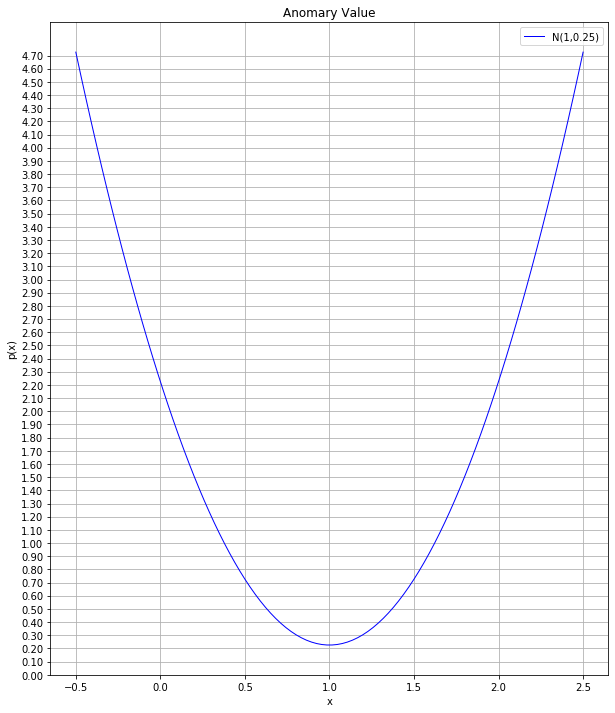

In [ ]:
# 確率密度分布
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(x, a,'-', color='blue', linewidth=1.0, label="N("+str(mu) + "," + str(sigma**2) + ")")
ax.set_title("Anomary Value")
yticks = np.arange(0.0, max(a), 0.1)
yticklabels = ["%.2f" % x for x in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
plt.show()

先ほどの正規分布にしたがって、  
『出現率が低いほど、異常の程度が高い』『出現率が高いほど、異常の程度は低い』が表現されています。

### Section0-2. 正規分布に従うデータからの異常検知
『個々の観測データが独立に単一の正規分布に従う』と仮定できる場合の、異常検知手法を学びます。  
**『ホテリング理論』** として知られる多変量解析における『外れ値』検出手法が、本項目のメインとなります。  
  
**異常検知手順の流れ**  
0. (準備) まず、異常検知を行うためにはデータの準備が必要。ここで、データには異常な観測値が含まれていないか、含まれていたとしてもその影響は無視できるものと仮定します。
1. ステップ1(分布推定)
2. ステップ2(異常度の定義)
3. ステップ3(閾値の決定)
  
今回は統計解析等によく使われるRのデータセットから「Davis」というデータを使用します。  
このデータセットには200人分の性別、身長(実測)、体重、身長(自己申告)の4種類のデータが用意されており、  
その中から体重のデータを使用する事にします。  
**[Rdatasets](https://vincentarelbundock.github.io/Rdatasets/datasets.html)**  
  
Pandasライブラリを使って、今回扱うDavisデータの中身をみてみます。

### Section0-3. 観察

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("./DATA/Davis.csv", header=0, index_col=0)
df

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
198,M,81,175,NaN,NaN
199,M,90,181,91.0,178.0


このデータには、性別、身長(実測)、体重、身長(自己申告)  
という４つのデータが$N=200$人にわたり記録されています。このうちの体重に注目します。  
この200人について、みていきます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from statistics import mean, variance
from scipy import stats

In [ ]:
# データセットの読み込み
num = []
data = []
with open('./DATA/Davis.csv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)

    for row in reader:
        num.append(int(row[0]))  #標本番号を取得
        data.append(int(row[2])) #体重データを取得

フワッと可視化してみます。

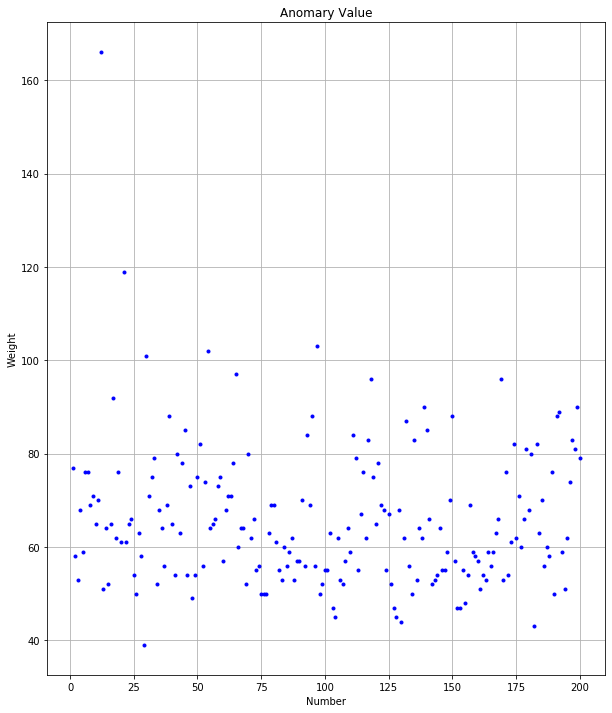

In [ ]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(num, data, '.', color='blue', )
ax.set_title("Anomary Value")
ax.set_xlabel('Number')
ax.set_ylabel('Weight')
plt.show()

これだとなんだかよくわからないので、体重の頻度の分布をみていきたいと思います。  
collectionsというライブラリを使って、頻度を算出します。

In [ ]:
import collections

In [ ]:
data_freq = data

In [ ]:
label = [int((i+1)*5) for i in range(36)]

※頻度といっても一つ一つのデータはユニークなデータなので、『区間』を設けます。この場合は、5kgごとに区間に分けるラベルを用意しています

In [ ]:
data_new = []
for i in range(len(label)):
    for j in data_freq:
        if j >= label[i] and j<label[i+1]:
            data_new.append(label[i])

体重の値によって、ラベルごとに分けていきます。分けた結果を、data_newに格納していきます

In [ ]:
len(data_new)

200

ちゃんと格納されているかdata_newの長さで、簡易に確認しています。  
collections.Counterと、most_common()で頻度も確認します。

In [ ]:
c = collections.Counter(data_new)

In [ ]:
c.most_common()

[(55, 36),
 (50, 33),
 (60, 31),
 (65, 27),
 (75, 17),
 (70, 13),
 (80, 13),
 (45, 8),
 (85, 8),
 (90, 3),
 (95, 3),
 (100, 3),
 (40, 2),
 (35, 1),
 (115, 1),
 (165, 1)]

In [ ]:
weight_class = []
class_count = []
for i, j in c.most_common():
    weight_class.append(i)
    class_count.append(j)

区間ごとに分けた体重の、それぞれの出現数をweight_classに追加していきます。  
weight_class を可視化すると、次のようになります。

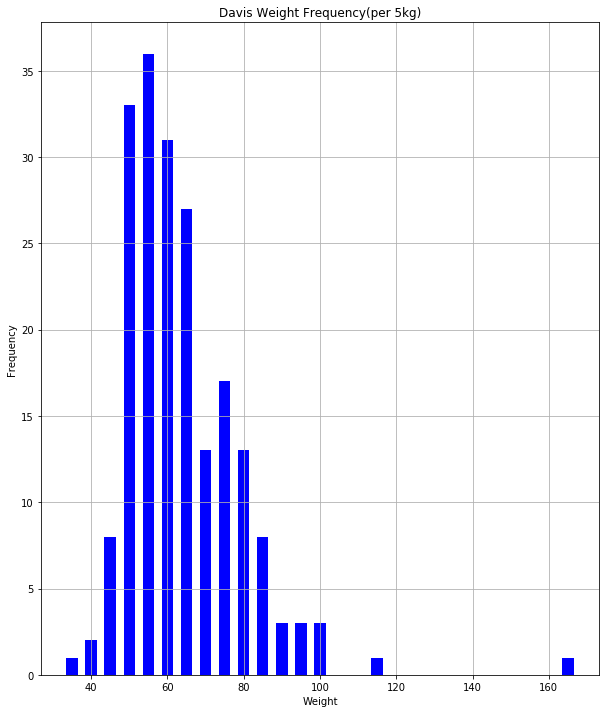

In [ ]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
ax.grid()
ax.bar(weight_class, class_count, width=3, color='blue', )
ax.set_title("Davis Weight Frequency(per 5kg)")
ax.set_xlabel('Weight')
ax.set_ylabel('Frequency')
plt.show()

#### Section0-3-1.分布推定
読み込んだ、Davisデータのうち、体重のみの平均と分散を計算します

In [ ]:
# 標本平均
mean = mean(data)
# 標本分散
variance = variance(data)

#### Section0-3-2. 異常度の定義
一つ一つの体重$x$に対して、異常度であるanomaly_score = $(x - mean)^2 / variance$を算出させています。  
算出させたら、anomaly_scoresに順次格納させています。

In [ ]:
# 異常度
anomaly_scores = []
for x in data:
    anomaly_score = (x - mean)**2 / variance
    anomaly_scores.append(anomaly_score)

#### Section0-3-3. 閾値の決定
ここでは、stats.chi2.intervalというモジュールを利用します。  
今回は、カイ２乗分布における上位1％を『異常』と仮定したときの、閾値はいくつかを算出させています。

In [ ]:
# カイ二乗分布による1%水準の閾値
threshold = stats.chi2.interval(0.99, 1)[1]

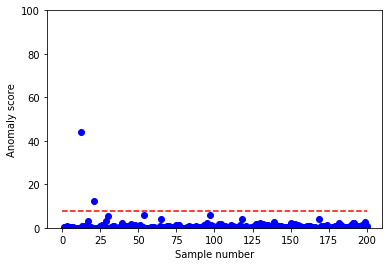

In [ ]:
# 異常度のプロット、結果の描画
plt.plot(num, anomaly_scores, "o", color = "b")
plt.plot([0,200],[threshold, threshold], 'k-', color = "r", ls = "dashed")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.ylim([0,100])
plt.show()

### Section0-4. 異常とは何か
ので、ここからは少しだけ理論的な話をします。  
#### 1. 分布推定
さっき図示した、"Davis Weight Frequency(per 5kg)"のデータを、一つの確率分布という形で『要約』することを考えましょう。  
"Davis Weight Frequency(per 5kg)"によれば、頻度の分布は、若干左右非対称ですが、おおむねひと山の形になっています。  
この山を表現する確率分布はいろいろ考えられますが、まずは正規分布に当てはめるとします。  
確率変数を$x$としたとき、平均$\mu$, 分散$\sigma^2$ をもつ正規分布 $N(x|\mu, \sigma)$は、
$$
N(x|\mu, \sigma) \equiv \frac{1}{(2\pi\sigma^2)^\frac{1}{2}}exp\left\{-\frac{1}{(2\sigma^2)^2}(x - \mu)^2\right\}
$$
ここで、≡は右辺の内容で左辺を定義するという意味で使います。  
何もこのような複雑な式で表現しなくても...と思いますが、一言でいえば、  
正規分布とは、平均と分散が固定されたときに、最も自然で偏見の少ない分布といえます。(一方、現実問題のデータはカオスで荒々しいです。)  
  
このような確率分布に含まれるパラメータ 平均$\mu$, 分散$\sigma^2$はデータから決めるべきパラメータで、そのパラメータを求めるのに
**『最尤推定』** という手法で決定するのが一般的です。  
$$
\hat{\mu} = \frac{1}{N}\sum_{n=1}^{N} x^{(n)}
$$
$$
\hat{\sigma}^{2} = \frac{1}{N}\sum_{n=1}^{N} \left(x^{(n)} - \hat{\mu}\right)^2
$$
ここで、文字の上に ^がありますが、これを"ハット"と呼びます。データから推定した値のことを表現しています。  
最初の式は、**標本平均**といいます。「全部を足して個数で割る」ということを表現しているので、文字通り平均となります。  
2番目の式については、**標本分散**といい、「平均値からのずれの２乗」について平均しています。要は、平均値からのずれの大きさを指標としています。  
分散という言葉は、平均値からのばらつきの大きさ、という意味です。  
これらを、正規分布の式に入れることで、予測分布、つまり、ここでは任意の誰かの体重を測定したときにどのような値をとるかの確率を表すモデル  
が、$N(x|\hat{\mu}, \hat{\sigma}^2)$のように与えられます。
#### 2. 異常度の定義
ある観測値$\boldsymbol{x}^{'}$がどのくらいの異常かを表す値$a(\boldsymbol{x}^{'})$, すなわち異常度を定義していきます。  
このノートブック冒頭でも触れたように、負の対数尤度を異常度として用いることにします。先ほどの正規分布の式に対数をとると次の式が得られます。 
$$
\frac{1}{2}\hat{\sigma}^2 \left(x^{'} - \hat{\mu} \right)^{2} + \frac{1}{2} In \left(2\pi \hat{\sigma}^{2} \right)
$$
となりますが、第２項の $1/2 In \left(2\pi \hat{\sigma}^{2} \right)$は観測値$\boldsymbol{x}^{'}$に依存しないので無視して、  
次の式の形のようになります。(きれいにするため、２をかけてます)  
$$
a(\boldsymbol{x}^{'}) \equiv \frac{1}{\hat{\sigma}^2} \left(x^{'} - \hat{\mu} \right)^{2} = \left(x^{'} - \hat{\mu} \right)^{2}
$$
これが、異常度として定義できたことになります。  
  
この式を直感的に解釈すると...  
「中心から離れれば離れるほど、異常度が高い」となりませんか？！  
この直感が、今後、この勉強会であらゆるところに活きてきます。  
  
ちなみに、この式の分母の$\hat{\sigma}$は標本分散の平方根、すなわち標準偏差です。偏差で割るということは、  
もともとばらつきが大きい場合は、多少の外れは多めにみましょうね、ほとんどばらつきのないデータはちょっとの外れでも問題視しましょうね、  
という気持ちが込められています。  
#### 3. 閾値の決定
任意の観測値$\boldsymbol{x}^{'}$に対して異常度は計算することが可能になりました。  
次に、閾値を決める必要があります。ここで、分位点(よんぶんのいち、へいきん、的なやつ)により異常度に閾値を設定するのが簡単ですが、  
せっかく観測点が正規分布をなすという仮定のもとでお話ししているので、もう少し理論的に閾値を設定できそうです。  
なぜなら、異常度$a(\boldsymbol{x}^{'})$の確率分布を明示的に求めることができるから、です。  
ここで、$F$分布と**カイ二乗分布**という二つの確率分布を導入します。※詳細は省きます(大学院数学以上に知識が必要となるため)  
  
アイデアのみ書きます。  
確率分布が定義できるということは、実は$a(\boldsymbol{x}^{'})$はバラつく可能性があることを示唆しています。  
その原因は二つあります。一つは、当然ながら、今観測した値$\boldsymbol{x}^{'}$のばらつきそのものです。  
もう一つは、$\hat{\mu}$と$\hat{\sigma}^2$の推定に用いたデータ$D$のばらつきです。  
例えば、ある年のクラスに、たまたま相撲部やレスリング部、ラグビー部のフロント連中が多く集まっていて最尤推定値が例年とは比較にならないほど、  
ずれていた場合です。もしくはずれている場合です。  
データ$D$に含まれる標本の個数が有限である限り、(逆に無限であれば無視できますが現実はそうではないですよね)  
このような危険性はいつでもどこでもあります。  
正規分布の仮定に基づくて異常度の確率分布をどのように導くかは、統計学における外れ値検出理論のすべてと言っても過言ではなく、  
それを詳細に学ぶことは、より高度な手法を考える際の基礎力となります。  
  
(ホテリング統計量の分布(1変数))  
１次元の観測データ$D=\{x^{(1)}, x^{(2)}, ... , x^{(N)}\}$の各観測値が独立に同じ分布$N(\mu, \sigma^2)$に従い、  
新たな観測点$x^{'}$も同じ分布に独立に従うとする。このとき、$a(\boldsymbol{x}^{'})$の定数倍は、自由度$(1, N-1)$のF分布に従う。  
すなわち、  
$$
\frac{N-1}{N+1}a{'} \sim F(1, N-1)
$$
特に, $N>>1$のときは、$a(\boldsymbol{x}^{'})$そのものが自由度1, スケール因子1のカイ二乗分布に従う:
$$
a(\boldsymbol{x}^{'}) \sim \chi ^2(1,1)
$$
  
もうこの時点で、「？？」となりますが、ひとまず上記のことを、**ホテリング統計量(ホテリングの**$T^2$**)** といいます。  
ざっくり説明すると、確率分布(この場合は、異常度) $a(\boldsymbol{x}^{'})$に対して、この$a(\boldsymbol{x}^{'})$は正常か異常かを判定してくれる  
「物差し」と理解してください。  
例えば、観測値$x^{'}$が$x^{'}=69.8Kg$と与えられたとき、異常度の計算をしたところ$a(\boldsymbol{x}^{'})=2.0$であったとします。  
異常判定という問題は、この値が、果たして正常時のばらつきに起因するのか、はたまたその系が異常状態に遷移したが故に生じたのかを見極める  
という問題となります。  
そのためには、$a(\boldsymbol{x}^{'})=2.0$という値が、正常時の分布に照らし合わせて、どの程度「あり得ない」のかを計算する必要があり、  
そのために、**ホテリング統計量(ホテリングの**$T^2$**)**、もっというと、カイ二乗分布を利用しているのです。(上位何%があり得ないのか)    
先ほどのプログラムでいえば、「閾値を1％値に選ぶ」というのは、「正常時には１％未満でしか起こらないくらいまれな値だから、  
きっと正常ではないのだろう」という理屈になります。

## Section2. 時系列分析による異常検知
Prophet, msticpyを利用した、Windowsイベントログの時系列分析による異常検知を簡単に実装してみます。

### Section2-1. SIEM, UEBA
SIEMとは、Security Information and Event Management の略称で、一般的にセキュリティ対策機器などからログを収集して一元管理して相関分析やその他分析手法によって、企業や組織が早期に脅威を発見するシステムやソフトウェア全般をいいます。  
近年では、SIEMに加えてUEBA, User and Entitiy Behavior Analytics と呼ばれる製品やソリューションが開発されています。これらはセキュリティ対策機器と併せてPCなどのエンドポイントのログを追加で収集することで、さらに詳細な単位での分析を行い、一般的なセキュリティ対策機器では検出しづらい内部の攻撃者などの内的要因によって発生する脅威の検出を目的としています。  
これら、SIEMやUEBAなどの異常検出あるいは異常検知アルゴリズムに機械学習が用いられています。  

上記背景より、今回はWindowsログを利用したイベント検知を行ってみたいと思います。  



*   今回扱うWindowsログとは  
Windowsにおけるイベントとは、利用者への通知を必要とするシステムあるいはプログラムで発生した事象を、またはログに追加されるエントリのことを指します。これらイベントは、Windowsイベントログサービスによって収集され、保存されます。イベントログは、利用者の行動やリソースの使用状況を追跡するだけでなく、システムの問題点を明かにするために利用される様々な履歴情報も含まれます。※イベントログに何が記録されるかは、都度関係するアプリケーションやシステム設定に大きく依存するため、環境や設定ごとに異なります
*   イベントの構成要素と種類  
・何が起こったか（イベント名、イベントカテゴリ、詳細）  
・いつ起こったか（日付や時刻）  
・発生したイベントに関連するユーザーは誰か（アカウント名、ユーザー名）  
・どのシステムで発生したか（ホスト名やIPアドレス）  
・どのリソースで発生したか（ファイルパスやドライバ名、プリンタ名）  



### Section2-2. イベント発生傾向と辞書攻撃の関係性
異常検知を考える上で、一つの仮説として、イベントの発生傾向が何らかのサイバー攻撃の脅威と相関がある、と考えます。  
この仮説を考える上で、実際のインシデント対応での事例を考えてみましょう。たとえば、あるWindowsサーバーに対して、パスワードの推測をしてログインを試みる辞書攻撃を受けて、侵入を売るしてしまった場合、当該サーバーのセキュリティイベントログにはログオンに関する情報が大量に出力されているはずです。  

*   イベントID 4626 ... ログオン成功
*   イベントID 4625 ... ログオン失敗
*   イベントID 4634/4647 ... ログオフ成功
*   イベントID 4672 ... 特権アカウント（Administrator）によるログオン

ツールによるパスワードの辞書攻撃を受けたとすれば、短期間に様々なパスワードの入力試行が行われ、その結果として多くのログオン失敗（イベントID 4625）がイベントログとして大量に記録されるはずです。


### Section2-3. 時系列分析による異常値検出
時間の経過によって観測された記録されたデータは、時系列データと言います。一般的に、時系列データに現れる傾向の基本的な形としては次のような変動要因が考えられます。

*   傾向変動（トレンド）
*   循環変動（サイクル）
*   季節変動（シーズン）
*   不規則変動（イレギュラー、またはノイズ）



[データセットの読み込み（Microsoft　の Senior Program ManagerのAshwin Patil）](https://github.com/ashwin-patil/threat-hunting-with-notebooks)

In [1]:
!ls

HostLogons-demo.csv  sample_data


In [2]:
import pandas as pd
# Date列にDateTime型を適用する
df = pd.read_csv('HostLogons-demo.csv', parse_dates=["Date"], infer_datetime_format=True)

ドメインコントローラなどに残る、特定のホスト（WIN-DC01）からのログオンのログとなります。  
日付に加えて、イベントIDとアカウント名、コンピュータ名、ログオンタイプ、それぞれの総数があるはず。

In [3]:
df

,Date,EventId,AccountNtdomain,ComputerName,logontype,TotalLogons
0,2018-01-03,Microsoft-Windows-Security-Auditing:4624,LABDOMAIN.LOCAL,WIN-DC01,10,2
1,2018-01-03,Microsoft-Windows-Security-Auditing:4624,LABDOMAIN.LOCAL,WIN-DC01,3,106
2,2018-01-03,Microsoft-Windows-Security-Auditing:4624,LABDOMAIN.LOCAL,WIN-DC01,4,68
3,2018-01-04,Microsoft-Windows-Security-Auditing:4624,LABDOMAIN.LOCAL,WIN-DC01,3,53
4,2018-01-04,Microsoft-Windows-Security-Auditing:4624,LABDOMAIN.LOCAL,WIN-DC01,4,89
...,...,...,...,...,...,...
343,2018-04-29,Microsoft-Windows-Security-Auditing:4624,LABDOMAIN.LOCAL,WIN-DC01,7,4
344,2018-04-30,Microsoft-Windows-Security-Auditing:4624,LABDOMAIN.LOCAL,WIN-DC01,10,1
345,2018-04-30,Microsoft-Windows-Security-Auditing:4624,LABDOMAIN.LOCAL,WIN-DC01,3,578
346,2018-04-30,Microsoft-Windows-Security-Auditing:4624,LABDOMAIN.LOCAL,WIN-DC01,4,53


In [ ]:
# Date列とComputerName列が同一の行のTotalLogons列をすべて加算して新たな行列にコピー
df_LogonSum = df.groupby(['Date','ComputerName'])['TotalLogons'].sum().reset_index()

# Date列とTotalLogons列のみを選択する
df_LogonSum = df_LogonSum[['Date','TotalLogons']]
df_LogonSum

,Date,TotalLogons
0,2018-01-03,176
1,2018-01-04,142
2,2018-01-05,85
3,2018-01-06,147
4,2018-01-07,142
...,...,...
113,2018-04-26,180
114,2018-04-27,98
115,2018-04-28,106
116,2018-04-29,322


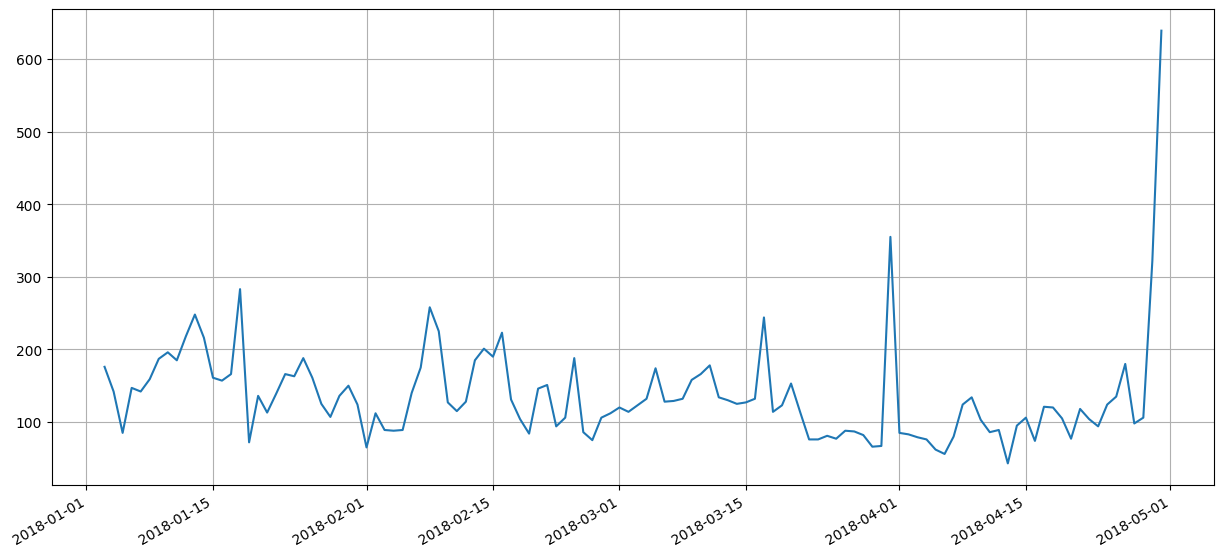

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)
# オリジナルの時系列データの描画
ax.plot(df_LogonSum['Date'],df_LogonSum['TotalLogons'], label="original")

# X軸ラベルの調整
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

plt.grid(True)

plt.show()

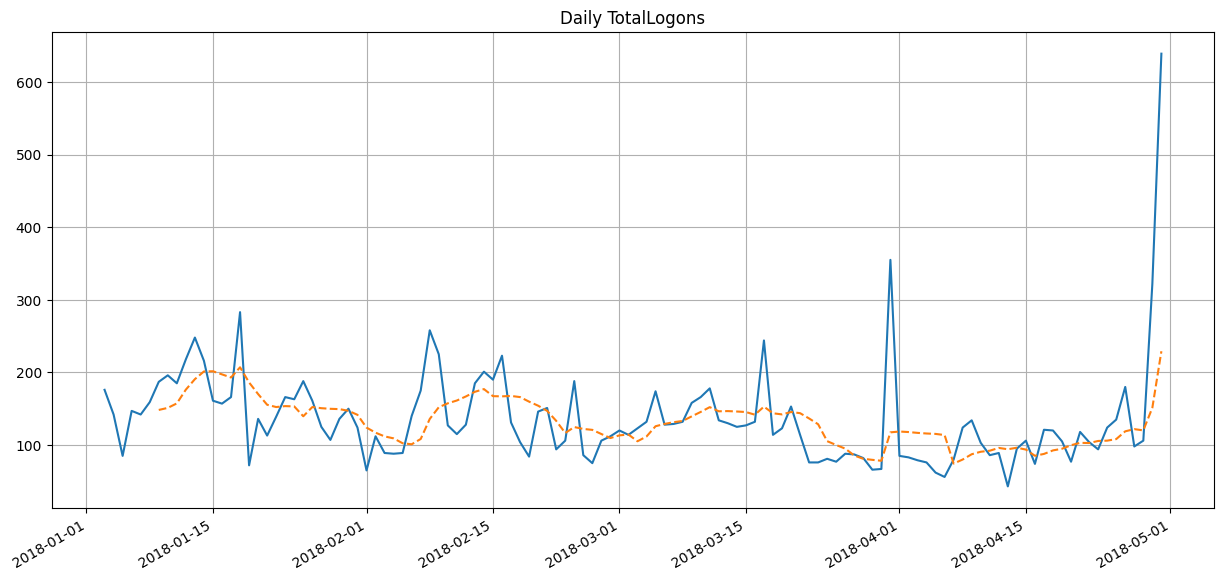

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)
# 原系列データの描画
ax.plot(
    df_LogonSum['Date'],
    df_LogonSum['TotalLogons'], 
    label="original"
    )
# 7区間移動平均
ax.plot(
    df_LogonSum['Date'],
    df_LogonSum['TotalLogons'].rolling(7).mean(), 
    label="rolling", 
    ls="dashed"
    )
plt.title('Daily TotalLogons')

# X軸ラベルの調整
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

plt.grid(True)

plt.show()

簡単に可視化してみると、移動平均で２００を超えるログオン数は少ないことがわかります。また、月末から月初に関してのログオン数は減少していることがわかります。月中にかけては増えていく傾向があるようです。

#### Section2-3-1. 時系列データの分解
さらに深掘りしていくために、傾向変動（T）、循環変動（C）、季節変動（S）、不規則変動（I/N）がそれぞれ独立しているか、または複雑に絡み合っているかであると考えられます。

複雑に絡み合っている場合、２つの考え方があります。



*   加法モデル: ４つの変動要因の単純な和（原系列=T+C+S+I）
*   乗法モデル: ４つの変動要因を比率として解釈した、それらの積（原系列=T×C×S×I）

今回扱うデータセットが、組織や企業で利用されるドメインコントローラーとした場合、繁忙期や残業、残業の規制などなどが存在するはずで、それらがログオン回数に影響している可能性があります。  
あるいは休日はそもそも職場にいないためにログオン回数がかなり少なくなる可能性も考えられます。そのような場合、たとえばログオン回数が９５％減少する可能性もあります。そこで今回は乗法モデルを使用して、データのトレンド・サイクルと季節変動、不規則変動の３つに分解して考えてみようと思います。プログラムとしては、`statsmodels`の `seasonal_decompose` を利用します。



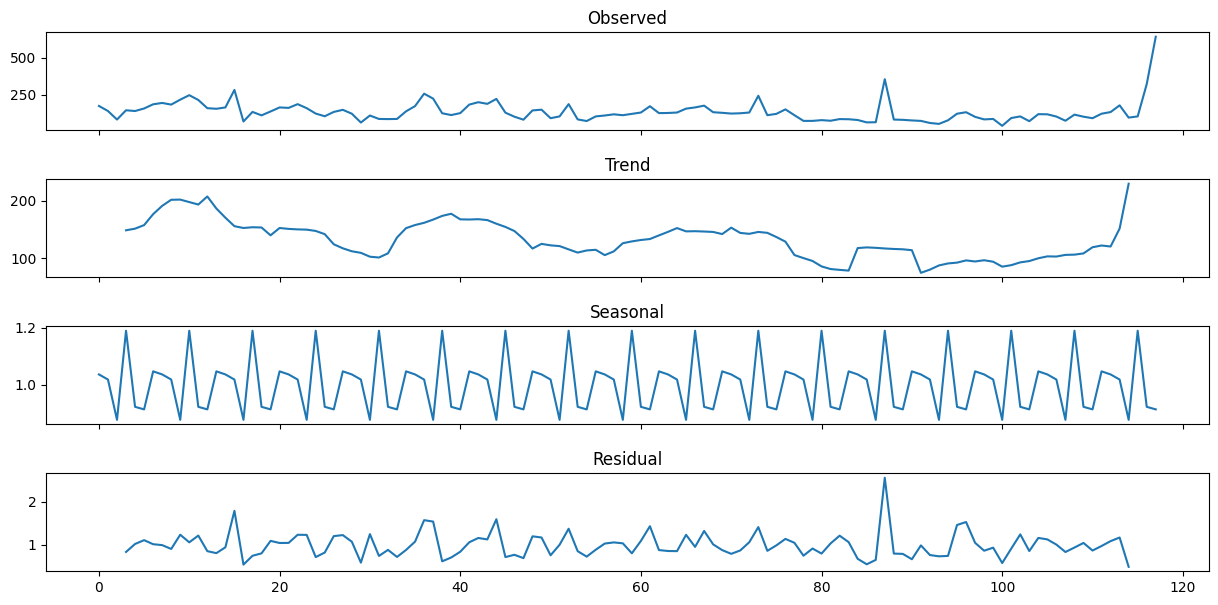

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# モデルにmultiplicativeを指定し、乗算モデルを使用する
result = seasonal_decompose(
    df_LogonSum['TotalLogons'], 
    model='multiplicative', 
    period=7
    )

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 7), sharex=True)
plt.subplots_adjust(hspace=0.5)

# 原系列
axes[0].set_title('Observed')
axes[0].plot(result.observed)

# 傾向変動
axes[1].set_title('Trend')
axes[1].plot(result.trend)

# 季節変動
axes[2].set_title('Seasonal')
axes[2].plot(result.seasonal)

# 不規則変動
axes[3].set_title('Residual')
axes[3].plot(result.resid)

# グラフの表示
plt.show()

トレンド要素のみ、抽出して再度可視化してみます

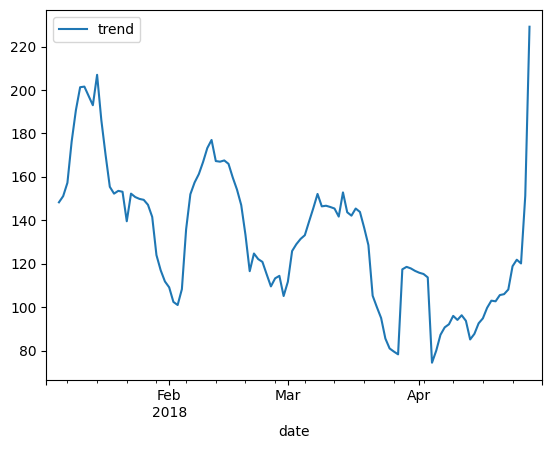

In [ ]:
trend = result.trend
trend = pd.DataFrame({'trend': trend, 'date':df_LogonSum.Date})
trend['date'] = pd.to_datetime(trend['date'], format='%Y-%m-%d')
trend = trend.set_index(['date'])
trend = trend.plot()

1月〜3月は月末から月初にかけてログオン数が減少するように、一方で月中はログオン数が増えていく傾向が、周期性が見て取れるかと思います。

#### Section2-3-2. prophetによる異常検知
ProphetはFaceBookが開発した時系列予測のパッケージです。
※参考[Prophetの使い方メモ](https://qiita.com/tchih11/items/42fc0d52a1486ba64b5d)

`daily_seasonality`, `weekly_seasonality`, `yearly_seasonality` はそれぞれ、日次・月次・年次での周期性の有無について設定できます。モデルについて、信頼区間の設定などもできます。時系列分析における信頼区間は、端的にいうと特定の確率で、ある一定の範囲に予測値が収まる、ということになります。`changepoint_range` はトレンドの変化点を推定するために利用します。デフォルトでは、与えられたデータの８０％を使用します。

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
from prophet import Prophet

def fit_predict_model(dataframe):
    model = Prophet(
        daily_seasonality = False, 
        weekly_seasonality = False, 
        yearly_seasonality = False,
        seasonality_mode = 'multiplicative',  # 乗法モデルを指定
        interval_width = 0.99, # 信頼区間の指定
        changepoint_range = 0.8 # 元データのうち80%を使って変化点検出を行う
        ) 
    # 月次の要素の季節性を追加
    model.add_seasonality(
        name='monthly', 
        period=30.5, 
        fourier_order=5
        )
    model = model.fit(dataframe)
    
    # 予測の実施
    forecast = model.predict(dataframe)
    
    # 予測結果のデータフレームにfact列を新たに追加し、原系列データをコピー
    forecast['fact'] = dataframe['y'].reset_index(drop = True)

    # 予測値と原系列のグラフを出力
    fig1 = model.plot(forecast)
    return forecast


DEBUG:cmdstanpy:input tempfile: /tmp/tmpu3o53pnu/aruz5hct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu3o53pnu/p71n95ge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34574', 'data', 'file=/tmp/tmpu3o53pnu/aruz5hct.json', 'init=/tmp/tmpu3o53pnu/p71n95ge.json', 'output', 'file=/tmp/tmpu3o53pnu/prophet_modela3_ldtqe/prophet_model-20230505054105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


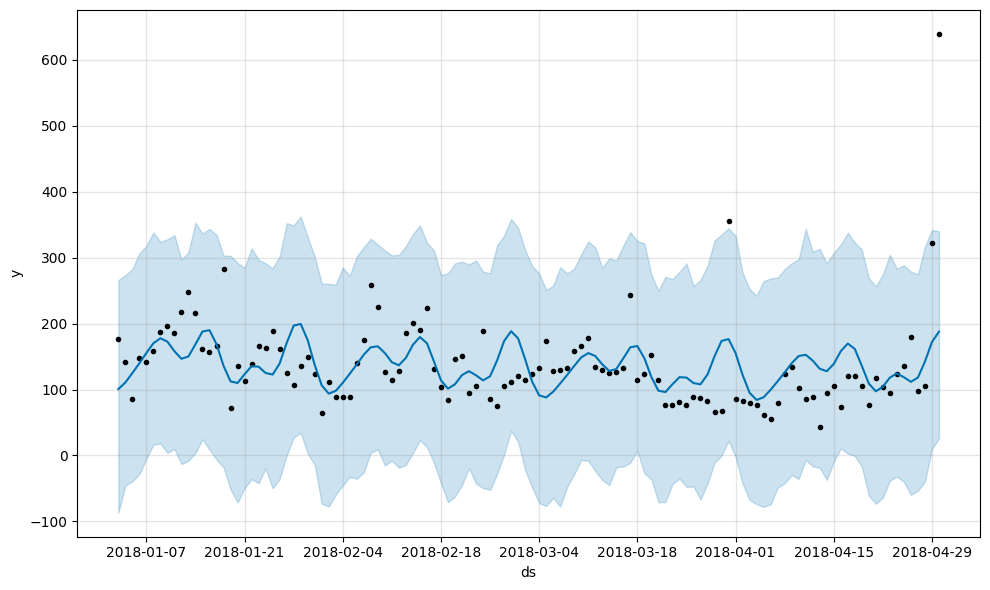

In [ ]:
# Prophet指定のカラム名に変更
df_LogonSum.columns = ['ds', 'y']

pred = fit_predict_model(df_LogonSum)

In [ ]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat,fact
0,2018-01-03,151.981677,-86.876863,265.858069,151.981677,151.981677,-0.338071,-0.338071,-0.338071,-0.338071,-0.338071,-0.338071,0.0,0.0,0.0,100.601101,176
1,2018-01-04,151.667921,-45.879518,273.090778,151.667921,151.667921,-0.270986,-0.270986,-0.270986,-0.270986,-0.270986,-0.270986,0.0,0.0,0.0,110.567986,142
2,2018-01-05,151.354165,-39.188964,282.978962,151.354165,151.354165,-0.174899,-0.174899,-0.174899,-0.174899,-0.174899,-0.174899,0.0,0.0,0.0,124.882443,85
3,2018-01-06,151.040409,-28.293924,306.178764,151.040409,151.040409,-0.074968,-0.074968,-0.074968,-0.074968,-0.074968,-0.074968,0.0,0.0,0.0,139.717156,147
4,2018-01-07,150.726653,-5.271869,317.814623,150.726653,150.726653,0.030923,0.030923,0.030923,0.030923,0.030923,0.030923,0.0,0.0,0.0,155.387621,142


結果は、`Forcast`オブジェクトと呼ばれる行列に格納されます。yhat列が予測値で、yhat_upper列とyhat_lower列がそれぞれの信頼区間の下限と上限になります。  

次に、異常値の行だけ抽出して、フラグの列を設定した上で、異常値のみを取り出してみます。

In [ ]:
def detect_anomalies(forecast):
    # Prophetの予測結果から、日付、トレンド要素、予測値、
    # 予測値の下限と上限、実際の値を新しい行列forecastedにコピーする
    forecasted = \
    forecast[['ds','trend', 'yhat', 'yhat_lower', \
              'yhat_upper', 'fact']].copy()

    # 行列forecastedにanomalies列を追加し、初期値にゼロを設定する
    forecasted['anomalies'] = 0

    # 予測値の上限より原系列が大きい場合には異常値と判定する
    forecasted.loc[forecasted['fact'] > \
                   forecasted['yhat_upper'], 'anomalies'] = 1
    
    return forecasted

pred = detect_anomalies(pred)

In [ ]:
pred[pred.anomalies == 1]

,ds,trend,yhat,yhat_lower,yhat_upper,fact,anomalies
87,2018-03-31,127.261021,176.449128,22.415385,344.402953,355,1
117,2018-04-30,133.949461,187.695326,25.282617,339.746400,639,1


#### Section2-3-3. msticpyによる異常検知
※参考[「全力回避フラグちゃん!」チャンネルの動画の再生回数/高評価数の異常値を可視化するとどうなるか？【可視化】【異常値検出】](https://qiita.com/mypsychology0/items/8f652634ef047977a596)  
※参考[Time Series Analysis and Anomalies Visualization](https://msticpy.readthedocs.io/en/latest/visualization/TimeSeriesAnomalies.html)

In [ ]:
# インストール後、ランタイムの再起動が必要になることがあるので注意
!pip install statsmodels==0.12.1
!pip install msticpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 36.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.6/829.6 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.3/238.3 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from msticpy.analysis.timeseries import timeseries_anomalies_stl
import pandas as pd

# ログデータを再ロードして整形する
df = pd.read_csv('HostLogons-demo.csv', infer_datetime_format=True)
df_LogonSum = df.groupby(
    ['Date','ComputerName']
    )['TotalLogons'].sum().reset_index()

# Date列とTotalLogons列のみを選択し、
# Date列のフォーマットを整形した上でインデックス指定する
df_LogonSum = df_LogonSum[['Date','TotalLogons']]
df_LogonSum['Date'] = pd.to_datetime(
    df_LogonSum['Date'], 
    format='%m/%d/%Y'
    ).dt.strftime('%Y-%m-%d')
df_LogonSum = df_LogonSum.set_index('Date')

# パラメータseasonalには奇数を指定する必要があり、
# 今回は月次の季節性があると仮定して31を指定
output = timeseries_anomalies_stl(df_LogonSum, seasonal=31)

In [ ]:
output[output.anomalies == 1]

,Date,TotalLogons,residual,trend,seasonal,weights,baseline,score,anomalies
81,2018-03-31,355,165,112,76,1,189,3.561666,1
111,2018-04-30,639,187,140,310,1,451,4.034056,1


In [ ]:
from msticpy.nbtools.timeseries import display_timeseries_anomolies

# 結果のDate列に日付型を適用し、かつ日付順に並び替える
output['Date'] = pd.to_datetime(output['Date'])
output = output.sort_values(by='Date')

timeseries_anomalies_plot = display_timeseries_anomolies(
    data=output, 
    y='TotalLogons',
    time_column='Date'
    )

<ipython-input-21-a112557f1968>:7: DeprecationWarning: Call to deprecated function (or staticmethod) display_timeseries_anomolies. (Will be removed in version 2.0.0. Please use display_timeseries_anomalies) -- Deprecated since version 1.7.0.
  timeseries_anomalies_plot = display_timeseries_anomolies(


### Section3. まとめ